<a href="https://colab.research.google.com/github/claudionornascimento/claudionornascimento/blob/main/trabalhoam_cod01_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O arquivo com o dataset contendo as informações de acesso em uma rede de computadores, podendo ser ***normal*** ou ***attack***, continha inicialmente **2222** features e após uma análise da necessidades daquelas que eram indispensáveis à identificação de acessos maldosos(attack) ou normais (normal), foram mantidas somente as features **appName**,**protocolName**,**destinationPort** e **Tag**

In [2]:
import pandas as pd

arquivo = pd.read_csv('https://raw.githubusercontent.com/WLMaia/trabalhoam/main/dataset/Arq_16_v1.csv', delimiter=';', on_bad_lines='skip')
arquivo = arquivo[['appName','protocolName','destinationPort','Tag']]


Normal    167604
Attack      3776
Name: Tag, dtype: int64


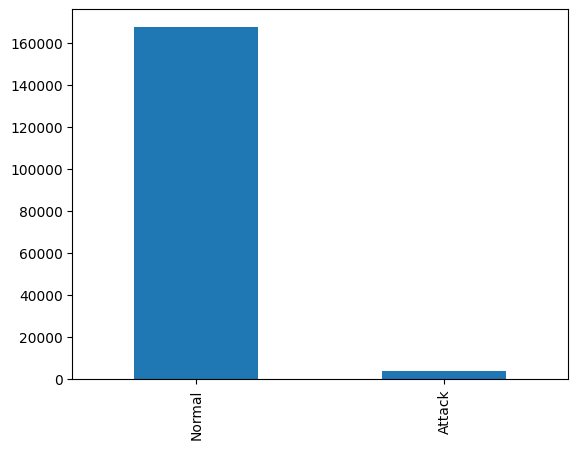

In [57]:
arquivo['Tag'].value_counts().plot.bar()
print(arquivo['Tag'].value_counts() )


O dataset considerado possui um total de 171310 instâncias, das quais 167604(97,83% do total)  correspondem a acessos normais e 3706 (2,16% do total) são de acesso malicioso (*attack*), **portanto o mesmo é bastante desbalanceado o que pode .....**

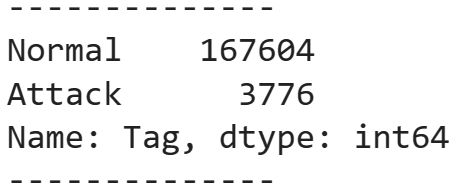

In [3]:
print(arquivo['appName'].value_counts())
print('--------------')
print(arquivo['protocolName'].value_counts())
print('--------------')
print(arquivo['Tag'].value_counts())
print('--------------')

HTTPWeb              56086
HTTPImageTransfer    48068
DNS                  36513
SecureWeb             8354
Unknown_UDP           6172
                     ...  
Citrix                   3
NortonGhost              2
GuptaSQLBase             1
Nessus                   1
Kazaa                    1
Name: appName, Length: 95, dtype: int64
--------------
tcp_ip     122298
udp_ip      48453
icmp_ip       623
igmp            4
ip              2
Name: protocolName, dtype: int64
--------------
Normal    167604
Attack      3776
Name: Tag, dtype: int64
--------------


Reduzindo a dimensionalidade do DataFrame arquivo, que contém os dados do dataset considerado e extraindo somente as features 'appName','protocolName','destinationPort' e 'Tag'

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
# extraindo as colunas 'appName','protocolName','destinationPort'
X = arquivo[['appName','protocolName','destinationPort']]

# y recebe a coluna Tag
y = arquivo.Tag

from sklearn import preprocessing
enc1 = preprocessing.OrdinalEncoder()
enc1.fit(arquivo[['appName','protocolName','destinationPort']])
X_enc = enc1.transform(arquivo[['appName','protocolName','destinationPort']])

#print('Ditribuição das classes antes do balanceamento', Counter(y))

#df_features = pd.DataFrame(X_enc, columns=['appName', 'protocolName', 'destinationPort'])
# Criar um DataFrame com a coluna de tags y
#df_tags = pd.DataFrame(y, columns=['Tag'])
# Concatenar os DataFrames de features e tags
#df_novo = pd.concat([df_features, df_tags], axis=1)
#df_novo
#df_novo.to_csv(csv_path, sep=',', index=False)
#X_enc



Para fazer com que os dados do dataset pudessem ser utilizado em um classificador do tipo de árvore de decisão, foi feito um pré-processamento que converteu atributos categóricos para ordinal.

In [5]:
from sklearn import preprocessing
enc1 = preprocessing.OrdinalEncoder()
enc1.fit(arquivo[['appName','protocolName','destinationPort']])
X_enc = enc1.transform(arquivo[['appName','protocolName','destinationPort']])

In [7]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
parte1 = arquivo[['appName', 'protocolName']]
enc.fit(parte1)
convertido = enc.transform(parte1)

# colunas da parte1, cujos atributos foram discretizados
colunas = ['appName', 'protocolName']
parte1_convertido_df = pd.DataFrame(convertido, columns=colunas)

parte2 = arquivo[['destinationPort', 'Tag']]

# precisa transformar array em dataframe
novo_arquivo = pd.concat([parte1_convertido_df, parte2], axis=1)
X_encoded = novo_arquivo[['appName','protocolName', 'destinationPort']]

#print(arquivo.appName.value_counts(sort=False,ascending=False))

## Balanceamento do dataset
 Foi feito um balanceamento do dataset, usando o SMOTE,  com o objetivo de ajustar a proporção para a classe minoritária em relação à classe majoritária. Foi usado um percentual progressivo de 20%, 30% e 40% de balanceamento da classe minoritária (attack) em relação à majoritária (normal).

In [8]:
smote = SMOTE(sampling_strategy=0.50)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

#print('Distribuição das classes após o balanceamento:', Counter(y_resampled))
#X_resampled
#y_resampled


No scikit-learn, existem vários classificadores que usam árvores de decisão como base. Aqui está uma lista de alguns classificadores populares do scikit-learn que utilizam árvores de decisão:

- **DecisionTreeClassifier**: Implementa a árvore de decisão para classificação.
- RandomForestClassifier: Combina várias árvores de decisão em um modelo de floresta aleatória para classificação.
- ExtraTreesClassifier: Semelhante ao Random Forest, também combina várias árvores de decisão, mas utiliza divisões aleatórias nos atributos.
- GradientBoostingClassifier: Constrói uma sequência de árvores de decisão, onde cada nova árvore corrige os erros das árvores anteriores.
- AdaBoostClassifier: Constrói uma sequência de árvores de decisão, atribuindo pesos diferentes a cada exemplo de treinamento para focar nos exemplos mais difíceis.
- HistGradientBoostingClassifier: Uma implementação de boosting baseada em histogramas para classificação, que usa árvores de decisão com divisões baseadas em histogramas.

In [9]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em atributos e classe

#X = arquivo[['appName','protocolName','destinationPort']] # Features
'''X = X_encoded
y = arquivo.Tag # Target variable
'''
X = X_resampled
y = y_resampled
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
X_train[:5]

In [10]:
from sklearn.tree import DecisionTreeClassifier
import time

arvore = DecisionTreeClassifier(random_state=0)
# Fazer o treinamento - sem modificar os parâmetros
start_time = time.time()
arvore.fit(X_train,y_train)
time_arvore = time.time() - start_time

print("Tempo de Construção: ", time_arvore)
print("Níveis da Árvore: ", arvore.get_depth())
print("Folhas: ", arvore.get_n_leaves())

Tempo de Construção:  0.7122671604156494
Níveis da Árvore:  21
Folhas:  132


Tempo de Construção:  0.2037410736083984
Níveis da Árvore:  19
Folhas:  99

In [13]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

## INCLUÍDO PELO CLAUDIONOR
from sklearn.metrics import confusion_matrix

# Realizar as predições na árvore (modelo treinado)
y_pred = arvore.predict(X_test)

# Verificar a acurácia
acuracia = metrics.accuracy_score(y_test, y_pred)
print("Acurácia:", str(round(acuracia * 100, 8)), "%")

print(metrics.classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

from tabulate import tabulate

table = tabulate(cm, tablefmt='latex')
print(table)

Acurácia: 79.71679351 %
              precision    recall  f1-score   support

      Attack       0.98      0.40      0.56     24961
      Normal       0.77      1.00      0.87     50461

    accuracy                           0.80     75422
   macro avg       0.87      0.70      0.72     75422
weighted avg       0.84      0.80      0.77     75422

\begin{tabular}{rr}
\hline
 9864 & 15097 \\
  201 & 50260 \\
\hline
\end{tabular}


Métricas sem balanceamento

Acurácia: 98.60543821%

              precision    recall  f1-score   support

      Attack       0.98      0.37      0.53      1120
      Normal       0.99      1.00      0.99     50294

    accuracy                           0.99     51414
   macro avg       0.98      0.68      0.76     51414
weighted avg       0.99      0.99      0.98     51414

Métricas com balanceamento de 20%

Acurácia: 89.3102191 %

              precision    recall  f1-score   support

  Attack       1.00      0.36      0. 53     10107
  
  Normal       0.89      1.00      0.94     50231

    accuracy                           0.89     60338
   macro    avg     0.94      0.68      0.74     60338
weighted avg       0.91      0.89      0.87     60338

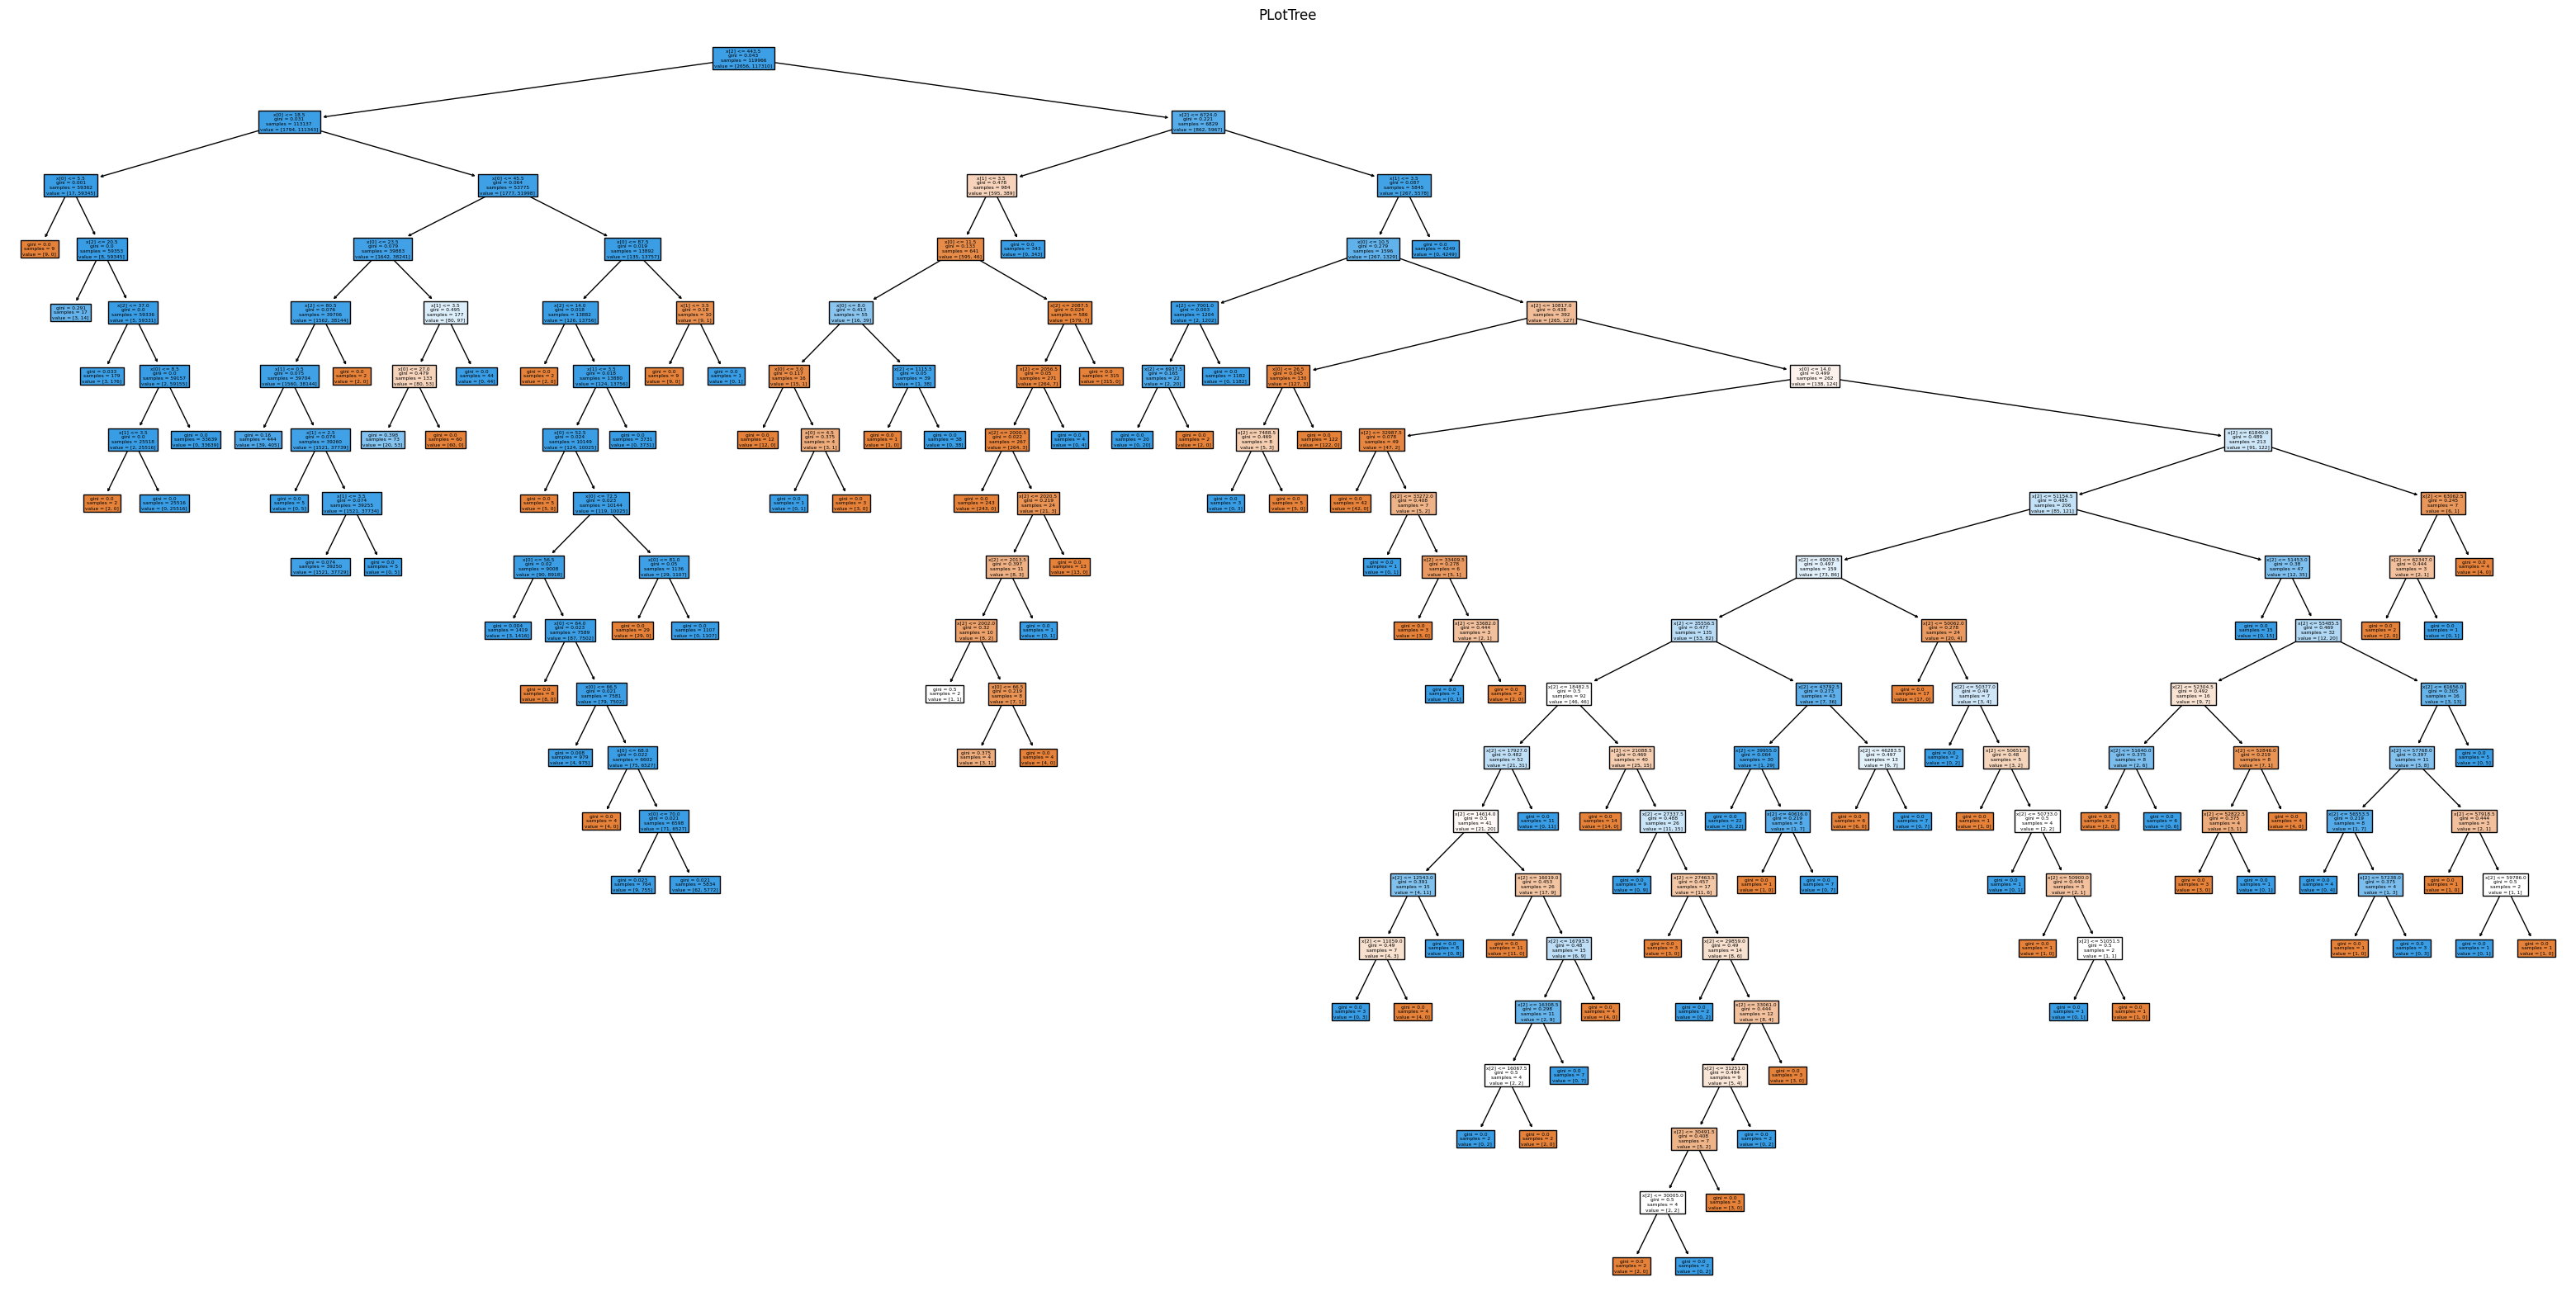

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(40, 20)
#fig.savefig('test2png.png', dpi=150)
plot_tree(arvore, filled=True)
plt.title("PLotTree")
fig.savefig('test2png.png', dpi=150)
plt.show()